Will only work if all the earlier points in the curve are filled. Thus the below techniques are not robust.

(i) Use bootstrapping to obtain a zero rate curve from the following prices of Treasury instruments with semiannual coupon payments:  

Security|Coupon|Price
---|---|---
3-Month T-bill|0|98.7 
6-Month T-bill|0|97.5
2-Year T-bond|4.875|100$\frac{5}{32}$ 
3-Year T-bond|4.875|100$\frac{5}{32}$
5-Year T-bond|4.625|99$\frac{22}{32}$
10-Year T-bond|4.875|101$\frac{22}{32}$

Assume that interest is continuously compounded.


Iteration:Yield:err=1:5.205590%:0.0070340
Iteration:Yield:err=2:5.234095%:0.0000003
Iteration:Yield:err=3:5.234096%:0.0000000
Backfilling zero rate for 0.25 years with 5.2341%
{0.25: 0.052340958194622006}
Iteration:Yield:err=1:5.002136%:0.0299495
Iteration:Yield:err=2:5.063552%:0.0000046
Iteration:Yield:err=3:5.063562%:0.0000000
Backfilling zero rate for 0.50 years with 5.0636%
{0.25: 0.052340958194622006, 0.5: 0.050635615968577435}
Iteration:Yield:err=1:4.527194%:0.3828993
Iteration:Yield:err=2:4.725723%:0.0060686
Iteration:Yield:err=3:4.728881%:0.0000848
Iteration:Yield:err=4:4.728926%:0.0000012
Iteration:Yield:err=5:4.728926%:0.0000000
Iteration:Yield:err=6:4.728926%:0.0000000
Backfilling zero rate for 1.00 years with 4.9520%
Backfilling zero rate for 1.50 years with 4.8405%
Backfilling zero rate for 2.00 years with 4.7289%
{0.25: 0.052340958194622006, 0.5: 0.050635615968577435, 1.0: 0.049520164581287045, 1.5: 0.04840471319399665, 2.0: 0.04728926180670625}
Iteration:Yield:err=1:4.38

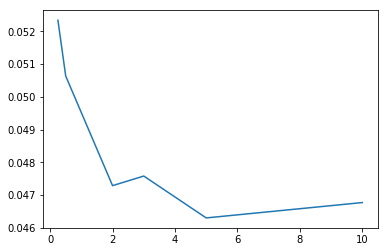

In [21]:
import numpy as np
import math
from matplotlib import pyplot

def fill(kc,ti):
    nc=np.full((len(kc)),np.nan)
    for i in range(len(ti)):
        if np.isnan(kc[i]):
            nc[i]=(kc[-1] + nc[i-1]*(len(ti)-1-i))/(len(ti)-i)
        else:
            nc[i]=kc[i]
    return nc
#B   -->known bond price
#C   -->Coupon
#Freq-->Frequency of coupons
#T   -->Maturity of Bond
#kc  -->known curve points
#y   --> is assumed to be at maturity of B
def f(kc,ti,cfs,B):
    #this is creating a new local variable kc
    kc=fill(kc,ti)
    #print(kc)
    return sum([cfs[i]*math.exp(-ti[i]*kc[i]) for i in range(len(ti))])-B

def f1(kc,ti,cfs):
    #this is creating a new local variable kc
    yterms=np.isnan(kc)
    yterms[-1]=True
    kc=fill(kc,ti)
    durpts=[-cfs[i]*ti[i]*math.exp(-ti[i]*kc[i]) for i in range(len(ti)) if yterms[i]]
    #print(durpts)
    return sum(durpts)
    

def buildcrv(C,T,B,Freq,c={}):
    t=np.arange(T,0,-1/Freq)[::-1]
    cfs=np.full((len(t)),C*100/Freq)
    cfs[-1]+=100
    kc=np.full((len(t)),np.nan)
    for i in range(len(t)):
        if t[i] in c:
            kc[i]=c[t[i]]
    
    int_tol=10**(-6)
    err_tol=10**(-9)

    oy=0.1
    kc[-1]=oy
    foy=f(kc,t,cfs,B)
    interval=oy
    iters=0
    while interval>int_tol or abs(foy)>err_tol:
        ny=oy-foy/f1(kc,t,cfs)
        interval=abs(ny-oy)
        oy=ny
        kc[-1]=oy
        foy=f(kc,t,cfs,B)
        iters+=1
        print("Iteration:Yield:err={}:{:.6%}:{:.7f}".format(iters,oy,foy))

    nans=np.isnan(kc)
    nans[-1]=True
    kc=fill(kc,t)
    for i in range(len(kc)):
        if(nans[i]):
            c[t[i]]=kc[i]
            print("Backfilling zero rate for {:.2f} years with {:.4%}".format(t[i],kc[i]))
    return c

bsbucket=np.array([[0,3/12,98.7,2],
          [0,6/12,97.5,2],
          [0.04875,2,100+5/32,2],
          [0.04875,3,100+5/32,2],
          [0.04625,5,99+22/32,2],
          [0.04875,10,101+4/32,2]])
finalCrv={}
for i in range(len(bsbucket)):
    finalCrv=buildcrv(*bsbucket[i])
    print(finalCrv)
k,v=list(finalCrv.keys()),list(finalCrv.values())
print(k)
pyplot.plot(k,v)
pyplot.show()

Iteration:Yield:err=1:5.222903%:0.0193039
Iteration:Yield:err=2:5.303163%:0.0000057
Iteration:Yield:err=3:5.303187%:0.0000000
Backfilling zero rate for 0.25 years with 5.3032%
{0.25: 0.05303186613409046}
Iteration:Yield:err=1:5.012500%:0.0550271
Iteration:Yield:err=2:5.128140%:0.0000310
Iteration:Yield:err=3:5.128205%:0.0000000
Backfilling zero rate for 0.50 years with 5.1282%
{0.25: 0.05303186613409046, 0.5: 0.05128205128184355}
Iteration:Yield:err=1:4.448019%:0.6264701
Iteration:Yield:err=2:4.783900%:0.0025420
Iteration:Yield:err=3:4.785274%:0.0000000
Iteration:Yield:err=4:4.785274%:0.0000000
Backfilling zero rate for 1.00 years with 5.0139%
Backfilling zero rate for 1.50 years with 4.8996%
Backfilling zero rate for 2.00 years with 4.7853%
{0.25: 0.05303186613409046, 0.5: 0.05128205128184355, 1.0: 0.05013894873329508, 1.5: 0.0489958461847466, 2.0: 0.04785274363619813}
Iteration:Yield:err=1:4.339085%:1.2615719
Iteration:Yield:err=2:4.811401%:0.0100859
Iteration:Yield:err=3:4.815238%:0

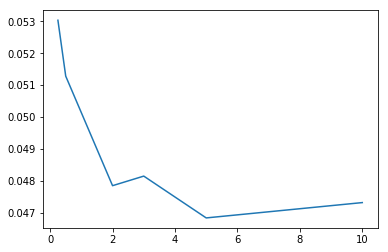

In [23]:
import numpy as np
import math
from matplotlib import pyplot

def fill(kc,ti):
    nc=np.full((len(kc)),np.nan)
    for i in range(len(ti)):
        if np.isnan(kc[i]):
            nc[i]=(kc[-1] + nc[i-1]*(len(ti)-1-i))/(len(ti)-i)
        else:
            nc[i]=kc[i]
    return nc
#B   -->known bond price
#C   -->Coupon
#Freq-->Frequency of coupons
#T   -->Maturity of Bond
#kc  -->known curve points
#y   --> is assumed to be at maturity of B
def f(kc,ti,cfs,Freq,B):
    #this is creating a new local variable kc
    kc=fill(kc,ti)
    #print(kc)
    return sum([cfs[i]/(1+kc[i]/Freq)**(ti[i]*Freq) for i in range(len(ti))])-B

def f1(kc,ti,cfs,Freq,B):
    h=10**(-6)
    
    y=kc[-1]
    kc[-1]=y+h
    fl=f(kc,ti,cfs,Freq,B)
    kc[-1]=y-h
    fr=f(kc,ti,cfs,Freq,B)
    kc[-1]=y
    return (fl-fr)/2/h
    

def buildcrv(C,T,B,Freq,c={}):
    t=np.arange(T,0,-1/Freq)[::-1]
    cfs=np.full((len(t)),C*100/Freq)
    cfs[-1]+=100
    kc=np.full((len(t)),np.nan)
    for i in range(len(t)):
        if t[i] in c:
            kc[i]=c[t[i]]
    
    int_tol=10**(-6)
    err_tol=10**(-9)

    oy=0.1
    kc[-1]=oy
    foy=f(kc,t,cfs,Freq,B)
    interval=oy
    iters=0
    while interval>int_tol or abs(foy)>err_tol:
        ny=oy-foy/f1(kc,t,cfs,Freq,B)
        interval=abs(ny-oy)
        oy=ny
        kc[-1]=oy
        foy=f(kc,t,cfs,Freq,B)
        iters+=1
        print("Iteration:Yield:err={}:{:.6%}:{:.7f}".format(iters,oy,foy))

    nans=np.isnan(kc)
    nans[-1]=True
    kc=fill(kc,t)
    for i in range(len(kc)):
        if(nans[i]):
            c[t[i]]=kc[i]
            print("Backfilling zero rate for {:.2f} years with {:.4%}".format(t[i],kc[i]))
    return c

bsbucket=np.array([[0,3/12,98.7,2],
          [0,6/12,97.5,2],
          [0.04875,2,100+5/32,2],
          [0.04875,3,100+5/32,2],
          [0.04625,5,99+22/32,2],
          [0.04875,10,101+4/32,2]])
finalCrv={}
for i in range(len(bsbucket)):
    finalCrv=buildcrv(*bsbucket[i])
    print(finalCrv)
k,v=list(finalCrv.keys()),list(finalCrv.values())
print(k)
pyplot.plot(k,v)
pyplot.show()